#                                                     TEMPERATURE  FORECASTING

Name :ADITHYA SANKAR L J

Organization: Entri Elevate

Date:24/06/2024

#  1.Overview of Problem Statement

Temperature forecasting is the scientific process of predicting the state of the atmosphere at a specific location and time in the future.This involves 
using various techniques and tools to analyze atmospheric conditions and predict changes.Weather prediction is the task of predicting the atmosphere
at a future time and a given area. This has been done through physical equations in the early days in which the atmosphere is considered fluid. The
current state of the environment is inspected, and the future state is predicted by solving those equations numerically, but we cannot determine 
very accurate weather and this can be improved with the help of science and technology. 

# 2.Objective

To develop the best  temparature Forcasting prediction model using machine learning techniques.

# 3.Data Description

Source :  https://www.kaggle.com/datasets/hiteshsoneji/historical-weather-data-for-indian-cities 
Dataset: delhi.csv

Features: maxtempC, mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex,moon_illumination, moonrise,moonset,sunrise,sunset, DewPointC,FeelsLikeC,HeatIndexC,
        WindChillC, WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC, visibility,winddirDegree,windspeedKmph

## 4.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings



# 5.Loading the Dataset

# Reading CSV file as weather_df and making date_time column as index of dataframe


In [2]:
temp_df = pd.read_csv('delhi.csv', parse_dates=['date_time'], index_col='date_time')
temp_df.head(5)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,14,19,0,50,0.0,1016,10,10,331,12
2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,13,21,0,51,0.0,1016,10,10,329,13
2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,12,22,0,52,0.0,1016,9,10,327,13
2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,23,0,54,0.0,1016,9,10,326,13
2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,21,2,52,0.0,1016,9,10,318,13


# 6.Data Preprocessing

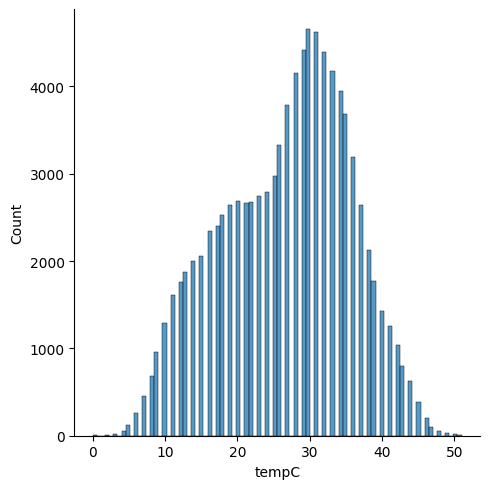

In [3]:
#To find outliers
sns.displot(temp_df["tempC"])

<Axes: ylabel='tempC'>

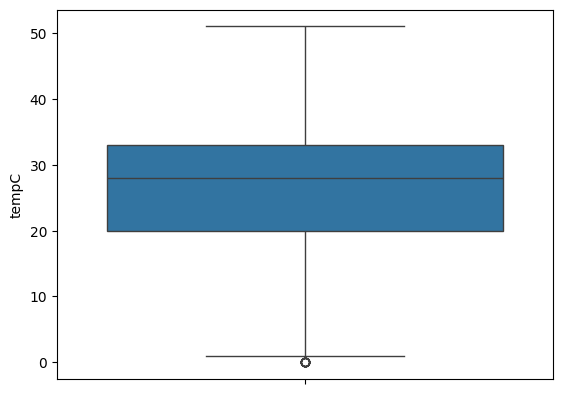

In [4]:
sns.boxplot(temp_df['tempC'])

Here no outliers found

## Checking for outliers using mean function

In [5]:
#Calculation of mean

mean=temp_df["tempC"].mean()
print("mean=",mean)

mean= 26.672484237597477


In [6]:
#Calculation of standard deviation

std=temp_df["tempC"].std()
print("std=",std)

std= 8.917469631653203


In [7]:
#Detection of outliers

threshold=3
outliers_mean=temp_df[(temp_df["tempC"]<mean-threshold*std)|(temp_df["tempC"]>mean+threshold*std)]
outliers_mean=temp_df[(temp_df["tempC"]<mean-threshold*std)|(temp_df["tempC"]>mean+threshold*std)]
print("outliers_mean ",outliers_mean)

outliers_mean  Empty DataFrame
Columns: [maxtempC, mintempC, totalSnow_cm, sunHour, uvIndex, uvIndex.1, moon_illumination, moonrise, moonset, sunrise, sunset, DewPointC, FeelsLikeC, HeatIndexC, WindChillC, WindGustKmph, cloudcover, humidity, precipMM, pressure, tempC, visibility, winddirDegree, windspeedKmph]
Index: []

[0 rows x 24 columns]


No outliers found

# 7.Data Exploration

# Checking columns in the dataframe

In [8]:
temp_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [9]:
# Display the first 5 rows of the dataset
temp_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,14,19,0,50,0.0,1016,10,10,331,12
2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,13,21,0,51,0.0,1016,10,10,329,13
2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,12,22,0,52,0.0,1016,9,10,327,13
2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,23,0,54,0.0,1016,9,10,326,13
2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,21,2,52,0.0,1016,9,10,318,13


Shape of the dataset

In [10]:
temp_df.shape

(96432, 24)

In [11]:
#Statistical summary
temp_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,32.681434,21.505475,0.0,11.213489,6.736685,4.390316,46.094077,12.170929,30.486270,30.608543,29.072569,11.983501,14.485119,41.323254,0.032072,1006.972333,26.672484,9.913307,214.948689,8.795151
std,7.479931,8.245626,0.0,2.155831,1.656212,3.372834,31.249725,8.049545,9.853813,9.708888,8.581811,6.182597,20.518663,21.351832,0.287923,7.789316,8.917470,0.992465,101.676151,4.329033
min,12.000000,1.000000,0.0,3.800000,3.000000,1.000000,0.000000,-22.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.000000,0.000000,987.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,14.000000,0.0,8.700000,5.000000,1.000000,18.000000,6.000000,23.000000,24.000000,23.000000,7.000000,0.000000,24.000000,0.000000,1000.000000,20.000000,10.000000,116.000000,6.000000
50%,34.000000,23.000000,0.0,11.600000,7.000000,5.000000,46.000000,11.000000,31.000000,31.000000,30.000000,11.000000,5.000000,38.000000,0.000000,1007.000000,28.000000,10.000000,259.000000,8.000000
75%,38.000000,28.000000,0.0,13.200000,8.000000,8.000000,73.000000,20.000000,38.000000,38.000000,35.000000,16.000000,21.000000,56.000000,0.000000,1014.000000,33.000000,10.000000,303.000000,11.000000
max,52.000000,43.000000,0.0,14.000000,11.000000,11.000000,100.000000,30.000000,65.000000,65.000000,54.000000,72.000000,100.000000,100.000000,17.600000,1025.000000,51.000000,20.000000,360.000000,44.000000


# Checking null values in dataset

In [12]:
temp_df.isnull().sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [13]:
# There is no null values in the dataset.

In [14]:
# New dataframe is made 

temp_df_new=temp_df.loc[:,['maxtempC','mintempC','uvIndex','humidity','tempC', 'sunHour','HeatIndexC', 'winddirDegree', 'pressure','windspeedKmph']]
temp_df_new.head()


,maxtempC,mintempC,uvIndex,humidity,tempC,sunHour,HeatIndexC,winddirDegree,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,22,9,4,50,10,8.7,14,331,1016,12
2009-01-01 01:00:00,22,9,4,51,10,8.7,14,329,1016,13
2009-01-01 02:00:00,22,9,4,52,9,8.7,13,327,1016,13
2009-01-01 03:00:00,22,9,4,54,9,8.7,13,326,1016,13
2009-01-01 04:00:00,22,9,4,52,9,8.7,13,318,1016,13


# New Dataframe's shape

In [15]:
temp_df_new.shape

(96432, 10)

# Columns in new dataframe

In [16]:
temp_df_new.columns

Index(['maxtempC', 'mintempC', 'uvIndex', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'winddirDegree', 'pressure', 'windspeedKmph'],
      dtype='object')

# 8.Data Visualization

In [17]:
#Ploting all the column values

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'uvIndex'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'winddirDegree'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

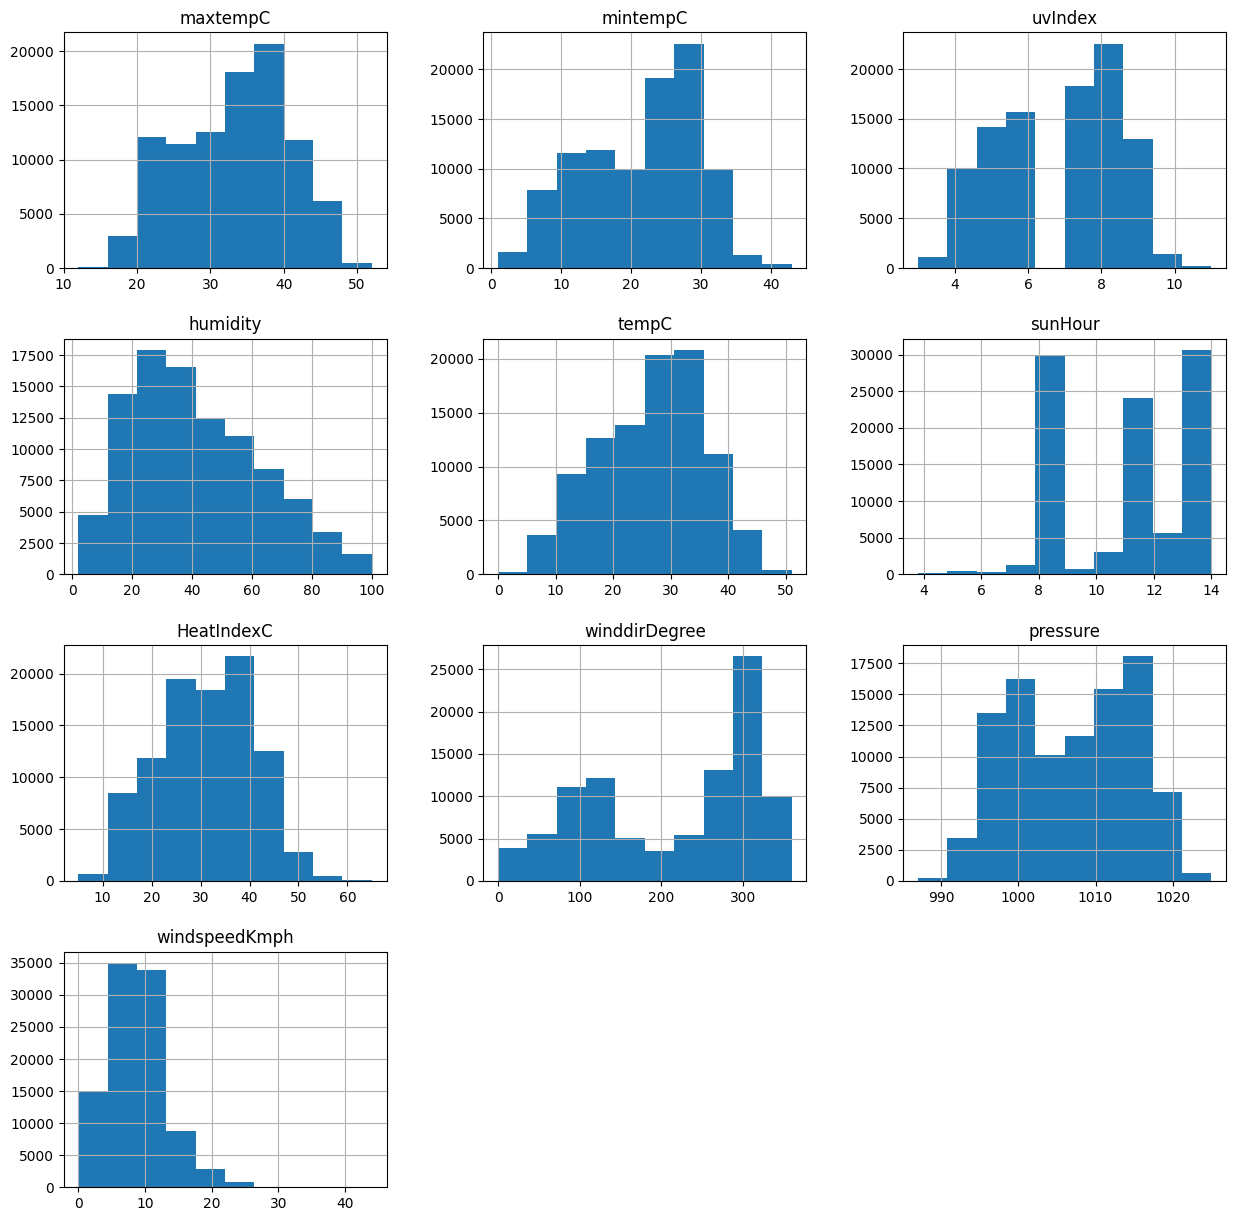

In [18]:
temp_df_new.hist(bins=10,figsize=(15,15))

# 9. Data Preparation

In [19]:
#Slicing the Dataframe 'weather_df_new' to include only the rows with dates from January 1,2019 to December 31,2020

In [20]:
temperature=temp_df_new['2019':'2020']
temperature.head() 

,maxtempC,mintempC,uvIndex,humidity,tempC,sunHour,HeatIndexC,winddirDegree,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,23,18,5,30,20,8.7,20,302,1020,6
2019-01-01 01:00:00,23,18,5,31,20,8.7,20,300,1020,6
2019-01-01 02:00:00,23,18,5,31,20,8.7,20,299,1020,6
2019-01-01 03:00:00,23,18,5,31,19,8.7,19,298,1020,6
2019-01-01 04:00:00,23,18,5,32,19,8.7,19,294,1020,6


separatig the feature (i.e. temperature) to be predicted from the rest of the featured.weather_y has temperature column,
weather_x stores the rest of the dataset

In [21]:
temperature_y=temp_df_new.pop("tempC")
temperature_x=temp_df_new

# 10.Split the data into training and testing sets (80% training, 20% testing)

In [22]:

train_X,test_X,train_y,test_y=train_test_split(temperature_x,temperature_y,test_size=0.2,random_state=0)

In [23]:
#Display the shapes of the training and testing sets

In [24]:
print("Shape of X_train: ",train_X.shape)
print("Shape of X_test: ",test_X.shape) 
print("Shape of y_train: ",train_y.shape)
print("Shape of y_test: ",test_y.shape)


Shape of X_train:  (77145, 9)
Shape of X_test:  (19287, 9)
Shape of y_train:  (77145,)
Shape of y_test:  (19287,)


In [25]:
train_y.head()

date_time
2013-04-26 04:00:00    29
2019-01-20 05:00:00    18
2015-05-27 02:00:00    29
2012-02-21 15:00:00    20
2010-05-12 21:00:00    29
Name: tempC, dtype: int64

# 11.Feature Scaling

In [26]:
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)


# 12. Build the Machine Learning model

# A. Multiple Linear Regression

In [27]:
# Instantiating the object and fitting

model=LinearRegression()
model.fit(train_X_scaled,train_y)


LinearRegression()

In [28]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


LinearRegression()

In [29]:
#predicting the values

prediction1 = model.predict(test_X_scaled)


In [30]:
# Error Calculation
# mean absolute error
np.mean(np.absolute(prediction1-test_y))

1.3846291746475947

In [31]:
#Dispersion of error
print('Variance score: %.2f' % model.score(test_X_scaled, test_y))

Variance score: 0.96


In [32]:
for i in range(len(prediction1)):
  prediction1[i]=round(prediction1[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction1,'diff':(test_y-prediction1)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,9.33,1.67
2012-11-11 20:00:00,20,21.37,-1.37
2019-09-19 11:00:00,31,29.30,1.70
2009-07-19 06:00:00,30,30.06,-0.06
2009-08-22 07:00:00,30,28.88,1.12
...,...,...,...
2011-12-07 13:00:00,25,23.17,1.83
2009-02-22 22:00:00,17,16.39,0.61
2019-12-04 22:00:00,25,23.19,1.81


#  B. Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

#Instantiating the object and fitting

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X_scaled ,train_y)

DecisionTreeRegressor(random_state=0)

In [34]:
# Predicting the values

prediction2=regressor.predict(test_X_scaled)

In [35]:
# Error Calculation
# mean absolute error
np.mean(np.absolute(prediction2-test_y))

0.9726499714833826

In [36]:
# Dispersion of error 
print('Variance score: %.2f' % regressor.score(test_X_scaled, test_y))

Variance score: 0.97


In [37]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,12.0,-1.0
2012-11-11 20:00:00,20,20.0,0.0
2019-09-19 11:00:00,31,30.0,1.0
2009-07-19 06:00:00,30,31.0,-1.0
2009-08-22 07:00:00,30,30.0,0.0
...,...,...,...
2011-12-07 13:00:00,25,25.0,0.0
2009-02-22 22:00:00,17,17.0,0.0
2019-12-04 22:00:00,25,25.0,0.0


# C.Random forest regression

In [38]:
# Importing module

from sklearn.ensemble import RandomForestRegressor

In [39]:
# Instantiating the object and fitting

regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X_scaled,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [40]:
# Predicting the values

prediction3=regr.predict(test_X_scaled)



In [41]:
# Error Calculation
# mean absolute error

np.mean(np.absolute(prediction3-test_y))

0.7697749364034168

In [42]:
# Dispersion of error
print('Variance score: %.2f' % regr.score(test_X_scaled, test_y))

Variance score: 0.99


In [43]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,10.87,0.13
2012-11-11 20:00:00,20,19.85,0.15
2019-09-19 11:00:00,31,30.47,0.53
2009-07-19 06:00:00,30,30.39,-0.39
2009-08-22 07:00:00,30,29.81,0.19
...,...,...,...
2011-12-07 13:00:00,25,24.09,0.91
2009-02-22 22:00:00,17,16.90,0.10
2019-12-04 22:00:00,25,24.37,0.63


# D. SVR Regression

In [44]:
# Importing module

from sklearn.svm import SVR


In [45]:
# Instantiating the object and fitting

svr = SVR(C=1.0, epsilon=0.1, kernel='rbf')


In [46]:
svr.fit(train_X_scaled, train_y)

SVR()

In [47]:
# Predicting the values

prediction4= svr.predict(test_X_scaled)


In [48]:
# Error Calculation
# meanabsolute error
np.mean(np.absolute(prediction4-test_y))

0.9485316065413296

In [49]:
#Dispersion of error 

print('Variance score: %.2f' % svr.score(test_X_scaled, test_y))

Variance score: 0.98


In [50]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,10.10,0.90
2012-11-11 20:00:00,20,20.11,-0.11
2019-09-19 11:00:00,31,29.79,1.21
2009-07-19 06:00:00,30,29.16,0.84
2009-08-22 07:00:00,30,29.16,0.84
...,...,...,...
2011-12-07 13:00:00,25,23.07,1.93
2009-02-22 22:00:00,17,15.77,1.23
2019-12-04 22:00:00,25,22.88,2.12


# E. MLP Regressor

In [51]:
# Importing module

from sklearn.neural_network import MLPRegressor


In [52]:
# Instantiating the object and fitting


mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=1)
mlp.fit(train_X_scaled,train_y)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=1)

In [53]:
# Predicting the values

prediction5= mlp.predict(test_X_scaled)


In [54]:
# Error Calculation
np.mean(np.absolute(prediction5-test_y))

0.8794418736335631

In [55]:
print('Variance score: %.2f' % mlp.score(test_X_scaled, test_y))

Variance score: 0.98


In [56]:
for i in range(len(prediction5)):
  prediction5[i]=round(prediction5[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction5,'diff':(test_y-prediction5)})

,Actual,Prediction,diff
date_time,,,
2018-01-24 06:00:00,11,10.20,0.80
2012-11-11 20:00:00,20,18.68,1.32
2019-09-19 11:00:00,31,29.98,1.02
2009-07-19 06:00:00,30,29.50,0.50
2009-08-22 07:00:00,30,29.57,0.43
...,...,...,...
2011-12-07 13:00:00,25,25.26,-0.26
2009-02-22 22:00:00,17,15.33,1.67
2019-12-04 22:00:00,25,24.25,0.75


# 1 3.Model Evaluation

#  Calculating R2-score,Mean absolute error,Residual sum of squares,RMSE- for Linear Regression

In [57]:


print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction1 ) )
print("RMSE: %.2f" % np.sqrt(np.mean((prediction1 - test_y) ** 2)))


Mean absolute error: 1.38
Residual sum of squares (MSE): 3.40
R2-score: 0.96
RMSE: 1.84


## R2-score,Mean absolute error,Residual sum of squares,RMSE- for Decision Tree Regression

In [58]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )
print("RMSE: %.2f" % np.sqrt(np.mean((prediction2 - test_y) ** 2)))

Mean absolute error: 0.97
Residual sum of squares (MSE): 2.35
R2-score: 0.97
RMSE: 1.53


##  R2 score,Mean absolute error,Residual sum of squares ,RMSE- of  Random forest regression

In [59]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )
print("RMSE: %.2f" % np.sqrt(np.mean((prediction3 - test_y) ** 2)))

Mean absolute error: 0.77
Residual sum of squares (MSE): 1.19
R2-score: 0.99
RMSE: 1.09


##  R2 score,Mean absolute error,Residual sum of squares,RMSE values of  SVR Regression

In [60]:

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction4 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )
print("RMSE: %.2f" % np.sqrt(np.mean((prediction4 - test_y) ** 2)))
      

Mean absolute error: 0.95
Residual sum of squares (MSE): 1.95
R2-score: 0.98
RMSE: 1.40


##  R2 score,Mean absolute error,Residual sum of squares of  MLP regression

In [61]:

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction5 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction5 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction5 ) )
print("RMSE: %.2f" % np.sqrt(np.mean((prediction5 - test_y) ** 2)))
      

Mean absolute error: 0.88
Residual sum of squares (MSE): 1.62
R2-score: 0.98
RMSE: 1.27


# 14.Interpretation of Results(Conclusion)

In [62]:
evaluation = np.array([
    ['MULTIPLE LINEAR', 1.31, 3.03,0.96,1.74],
    ['DECISION TREE', 0.64,1.28,0.98,1.13],
    ['RANDOM FOREST', 0.52, 0.66,0.99,0.81],
    ['SVR',0.66,1.11,0.99,1.05],['MLP',0.58,0.88,0.99,0.94]
])

columns = ['ALGORITHM', 'MAE', 'MSE','R2 SCORE','RMSE']

df = pd.DataFrame(evaluation, columns=columns)
print(df)



         ALGORITHM   MAE   MSE R2 SCORE  RMSE
0  MULTIPLE LINEAR  1.31  3.03     0.96  1.74
1    DECISION TREE  0.64  1.28     0.98  1.13
2    RANDOM FOREST  0.52  0.66     0.99  0.81
3              SVR  0.66  1.11     0.99  1.05
4              MLP  0.58  0.88     0.99  0.94




# Multiple Linear Regression: 

This regression model has high RMSE,mean absolute error hence turned out to be the least accurate model. 

# Decision Tree Regression: 
    
This regression model has medium RMSE,  mean absolute error hence turned out to be the little accurate model. 


# Random Forest Regression:
    
This regression model has low  RMSE, mean absolute error  hence turned out to be the more accurate model. 

# SVR Regression: 
    
This regression model has medium  RMSE, mean absolute error hence turned out to be the little accurate model. 

# MLP Regression: 
    
This regression model has medium  RMSE,  mean absolute error hence turned out to be the little accurate model. 


# 15. Future Work

-Explore deep learning algorithms for potentially higher accuracy.
-Update the model periodically with new data.
-Address the imbalanced data through resampling techniques.
-Consider adding more features to enhance predictive power.